### Complexes

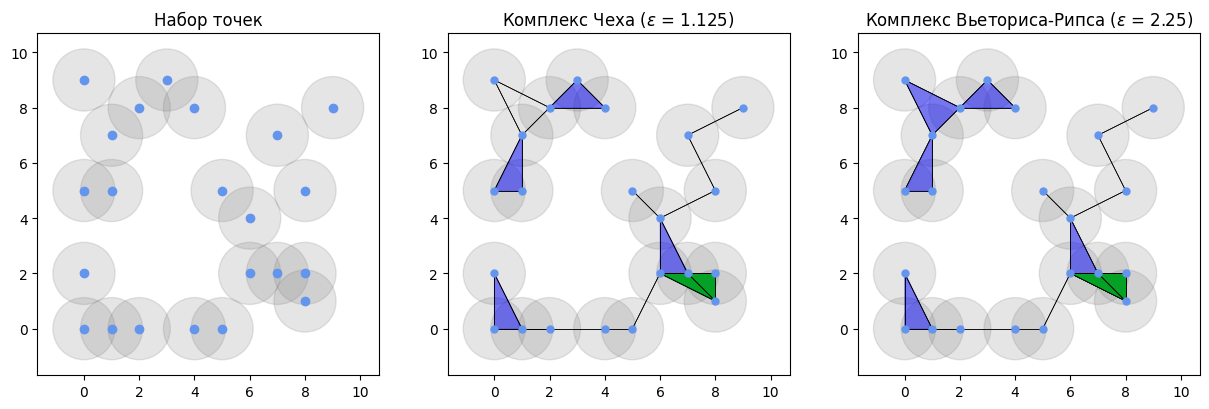

In [10]:
import numpy
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs

eps = 1.125
numpy.random.seed(6876)
homology_dimensions = [ 3, 4, 5, 2, 1 ]

points = numpy.random.randint(0, 10, (25, 2))
points = numpy.unique(points, axis = 0)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

def setup_axis(ax, points):
    ax.set_aspect('equal')
    for (x, y) in points:
        ax.add_patch(ptchs.Circle((x, y), eps, color = 'gray', alpha = 0.2))
    ax.scatter(points[:, 0], points[:, 1], alpha = 0)

def draw_simplex(ax, points):
    colors = [ None, 'cornflowerblue', 'black', (0, 0, 1, 0.1), (0, 0.75, 0, 0.1) ]
    color = colors[len(points)]
    if len(points) == 1:
        ax.scatter(points[0][0], points[0][1], 25, color = color)
    else:
        for pts in itertools.permutations(points):
            ax.add_patch(ptchs.Polygon(pts, color = color, linewidth = 0.5))


setup_axis(axes[0], points)
axes[0].set_title('Набор точек')
axes[0].scatter(points[:, 0], points[:, 1], color = 'cornflowerblue')


setup_axis(axes[1], points)
axes[1].set_title(f'Комплекс Чеха ($\epsilon$ = {eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        pts = numpy.array(pts)
        xmin, xmax = numpy.min(pts[:, 0]), numpy.max(pts[:, 0])
        ymin, ymax = numpy.min(pts[:, 1]), numpy.max(pts[:, 1])
        if (xmax - xmin > 2 * eps) or (ymax - ymin > 2 * eps): continue
        x_range = numpy.arange(xmin - eps, xmax + eps, 0.01)
        y_range = numpy.arange(ymin - eps, ymax + eps, 0.01)
        for (c_x, c_y) in itertools.product(x_range, y_range):
            x_dist = (pts[:, 0] - c_x) ** 2
            y_dist = (pts[:, 1] - c_y) ** 2
            is_ok = (x_dist + y_dist) <= (eps ** 2)
            if (is_ok.all()):
                draw_simplex(axes[1], pts)
                break


setup_axis(axes[2], points)
axes[2].set_title(f'Комплекс Вьеториса-Рипса ($\epsilon$ = {2 * eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        is_simplex = True
        for (x1, y1), (x2, y2) in itertools.product(pts, pts):
            dist = (x2 - x1) ** 2 + (y2 - y1) ** 2
            if dist > (2 * eps) ** 2:
                is_simplex = False
                break
        if is_simplex: draw_simplex(axes[2], pts)

fig.savefig(f"complexes.svg")
fig.savefig(f"complexes.png")

### Point cloud

In [84]:
import numpy
import gtda.plotting
import gtda.time_series

x = numpy.linspace(0, 50, 1000)
y = (numpy.cos(x) + numpy.sin(numpy.pi / 2 * x))

embedding = gtda.time_series.SingleTakensEmbedding(parameters_type="fixed", dimension = 3, time_delay = 16, stride = 3)
pc = embedding.fit_transform(y)
pc = pc @ numpy.array([
    [ numpy.cos(-numpy.pi / 2), -numpy.sin(-numpy.pi / 2), 0 ],
    [ numpy.sin(-numpy.pi / 2), numpy.cos(-numpy.pi / 2), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)
fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'yaxis': { 'nticks': 0, 'range': [ -3, 3 ] },
        'zaxis': { 'nticks': 0, 'range': [ -3, 3 ] }
    }
)
display(fig)
fig.write_image(file = f"point_cloud-1.svg", format = "svg")

In [165]:
x = numpy.linspace(0, 50, 1000)
y = numpy.cosh(numpy.cos(numpy.pi / 2 * x) + numpy.sin(x))

pc = embedding.fit_transform(y)
alpha = numpy.pi
pc = pc @ numpy.array([
    [ numpy.cos(alpha), -numpy.sin(alpha), 0 ],
    [ numpy.sin(alpha), numpy.cos(alpha), 0 ],
    [ 0, 0, 1 ]
])

fig = gtda.plotting.plot_point_cloud(pc)

fig.update_layout(
    autosize = False,
    scene = {
        'xaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'yaxis': { 'nticks': 0, 'range': [ -4, -0.5 ] },
        'zaxis': { 'nticks': 0, 'range': [ 0, 4.5 ] }
    },
    scene_camera = {
        'up': { 'x': 0, 'y': 0, 'z': 1 },
        'center': { 'x': 0, 'y': 0, 'z': 0 },
        'eye': { 'x': 1.5, 'y': 1.5, 'z': 0.5 }
    }
)

display(fig)
fig.write_image(file = f"point_cloud-2.svg", format = "svg")